# Validation curves
Validation curves are plots of the training and test accuracies as functions
of model parameters, for example, the alpha regularization parameter in ridge regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,  validation_curve
from sklearn.utils import shuffle

## Load the dataset

In [2]:
df = pd.read_excel('../Datasets/Boston.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


## Explore the dataset

In [3]:
df.shape

(506, 14)

In [4]:
colnames = df.columns.values
colnames

array([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'], dtype=object)

In [5]:
df.corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [6]:
df = shuffle(df)

## Select the features

In [7]:
x = df[colnames[0:13]]
y = df[colnames[13]]

## Create train and test scores for validation curve

In [8]:
estimator = Ridge()

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator, x, y, cv=10, 
                                             param_name='alpha', param_range= param_range ,n_jobs=-1)

In [9]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

## Plot the validation curve

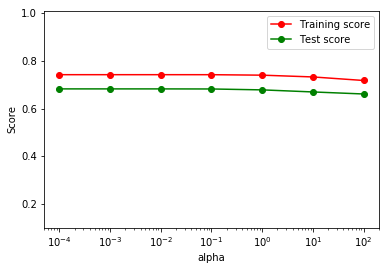

In [10]:
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Test score')
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Score')
plt.ylim([0.1,1.01])
plt.legend(loc='best')
plt.show()